In [ ]:
!wget -nc "https://github.com/joyarup/Hackathon-WS/raw/main/Feature_Track.xlsx"
!wget -nc "https://github.com/joyarup/Hackathon-WS/raw/main/Feature_Simulation.xlsx"

File ‘Feature_Track.xlsx’ already there; not retrieving.

File ‘Feature_Simulation.xlsx’ already there; not retrieving.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np

In [ ]:
track_data = pd.read_excel("/content/Feature_Track.xlsx")
sim_data = pd.read_excel("/content/Feature_Simulation.xlsx")

In [ ]:
track_data

,Unnamed: 0,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,...,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal,dataset_label
0,0,0AC2A4,1,7,1,1,0,0,1,0,...,0.08812,0.13469,0.08590,0.05499,0.04078,0.08419,0.06275,0.03722,0.02711,0
1,1,0AC2A4,1,27,1,0,1,0,1,0,...,0.08118,0.12483,0.07588,0.04060,0.02869,0.05951,0.04759,0.02963,0.01753,0
2,2,0AC2A4,1,33,1,0,0,1,1,0,...,0.11480,0.10121,0.09079,0.04339,0.02727,0.06250,0.04305,0.03296,0.01751,0
3,3,0AC2A4,1,43,1,1,0,0,0,0,...,0.12873,0.11832,0.11087,0.04872,0.02917,0.06894,0.04766,0.03627,0.01744,0
4,4,0AC2A4,1,58,1,1,0,0,0,0,...,0.14454,0.13428,0.13604,0.04173,0.02743,0.05937,0.04344,0.03132,0.01762,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,1051,8924EA,7,104,0,1,0,1,0,0,...,0.05568,0.03106,0.04034,0.01196,0.01110,0.01724,0.01730,0.00886,0.00729,0
1052,1052,8924EA,7,112,0,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1053,1053,8924EA,7,115,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1054,1054,8924EA,7,130,1,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
sim_data

,Unnamed: 0,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,...,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal,dataset_label
0,0,0AC2A4,1,13,1,0,0,1,0,0,...,0.07737,0.12307,0.07681,0.05046,0.03492,0.07430,0.05289,0.03606,0.02393,1
1,1,0AC2A4,1,32,0,1,0,1,0,0,...,0.10296,0.14606,0.10325,0.03636,0.02433,0.05822,0.04136,0.02535,0.01391,1
2,2,0AC2A4,1,36,0,0,1,1,0,0,...,0.12355,0.09483,0.08173,0.04524,0.02847,0.06055,0.04321,0.03586,0.01923,1
3,3,0AC2A4,1,42,1,0,0,0,0,0,...,0.12153,0.11255,0.10920,0.04928,0.02923,0.07192,0.04653,0.03536,0.01832,1
4,4,0AC2A4,1,52,1,0,0,0,0,1,...,0.13454,0.13270,0.13759,0.04501,0.02943,0.06175,0.04715,0.03511,0.01838,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1282,F9D528,6,110,0,1,0,1,0,0,...,0.12060,0.09136,0.11785,0.05030,0.04819,0.06937,0.08329,0.03837,0.02643,1
1283,1283,F9D528,6,122,0,0,1,1,0,0,...,0.12266,0.07359,0.09279,0.06202,0.04435,0.07684,0.06629,0.05423,0.03049,1
1284,1284,F9D528,6,125,0,0,0,0,1,0,...,0.13272,0.09911,0.13874,0.05765,0.05772,0.07704,0.09484,0.04535,0.03515,1
1285,1285,F9D528,6,141,1,0,0,1,0,0,...,0.09620,0.07806,0.08509,0.04293,0.04075,0.05465,0.05843,0.03598,0.02968,1


# Data Preparation

In [ ]:
track_data['dataset_label'] = 0  # Label for track_data
sim_data['dataset_label'] = 1

In [ ]:
track_data['surprise'].value_counts(), sim_data['surprise'].value_counts()

(2    911
 1    145
 Name: surprise, dtype: int64,
 2    1122
 1     165
 Name: surprise, dtype: int64)

## Approach 1

In [ ]:
violation_slowdown

In [ ]:
X_1 = track_data.drop(columns=['Unnamed: 0', 'subject', 'lap', 'dataset_label'])
y_1 = track_data['dataset_label']

# Imputing missing values if any
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed_1 = imputer.fit_transform(X_1)

# Normalizing the data
scaler = StandardScaler()
X_scaled_1 = pd.DataFrame(scaler.fit_transform(X_imputed_1), columns=X_1.columns)

# Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)


In [ ]:
X_sim_1 = sim_data.drop(columns=['Unnamed: 0', 'subject', 'lap', 'dataset_label'])
y_sim_1 = sim_data['dataset_label']

# Imputing missing values if any
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed_sim_1 = imputer.fit_transform(X_sim_1)

# Normalizing the data
scaler = StandardScaler()
X_scaled_sim_1 = pd.DataFrame(scaler.fit_transform(X_imputed_sim_1), columns= X_sim_1.columns)

# X_train_sim, X_test_sim, y_train_sim, y_test_sim = train_test_split(X_scaled_sim, y_sim, test_size=0.3, stratify=y_sim, random_state=42)


In [ ]:
# Combine the datasets
combined_data = pd.concat([X_scaled_1, X_scaled_sim_1], ignore_index=True)
combined_y = pd.concat([y_1, y_sim_1], ignore_index=True)

# Separate features and target variable
# X = combined_data.drop('dataset_label', axis=1)
# y = combined_data['dataset_label']

# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(combined_data, combined_y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Training the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_1, y_train_1)

# Predicting and evaluating the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test_1)
accuracy_gb = accuracy_score(y_test_1, y_pred_gb)
report_gb = classification_report(y_test_1, y_pred_gb)

print(accuracy_gb)
print(report_gb)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       376

    accuracy                           1.00       703
   macro avg       1.00      1.00      1.00       703
weighted avg       1.00      1.00      1.00       703



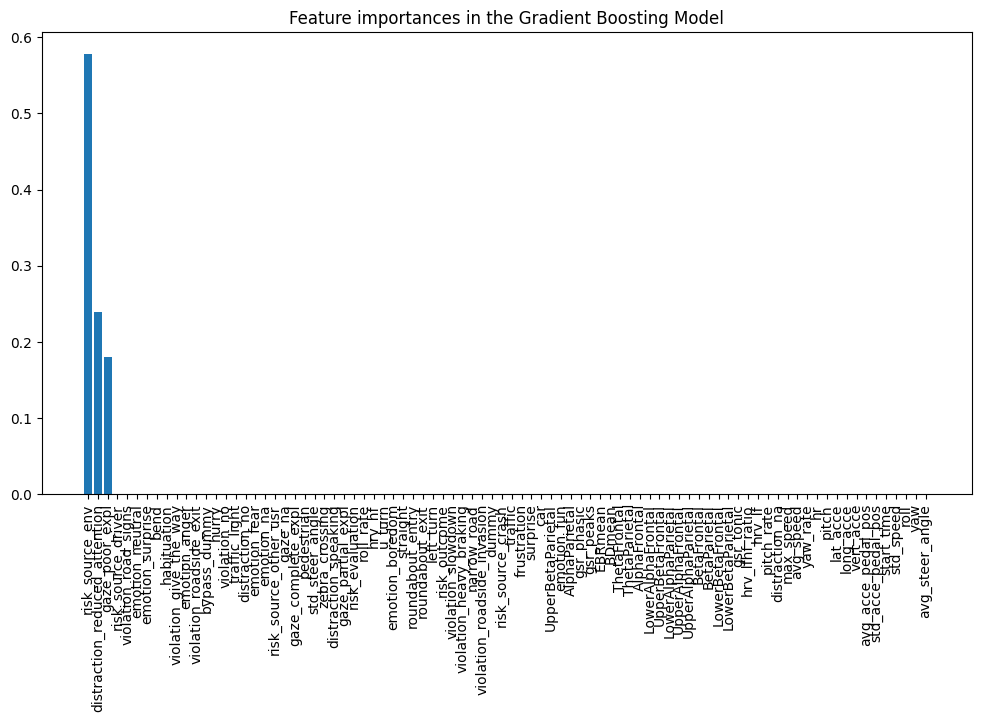

Index(['risk_source_env', 'distraction_reduced_attention', 'gaze_poor_expl',
       'risk_source_driver', 'violation_road_signs', 'emotion_neutral',
       'emotion_surprise', 'bend', 'habituation', 'violation_give_the_way',
       'emotion_anger', 'violation_roadside_exit', 'bypass_dummy', 'hurry',
       'violation_no', 'traffic_light', 'distraction_no', 'emotion_fear',
       'emotion_na', 'risk_source_other_usr', 'gaze_na', 'gaze_complete_expl',
       'pedestrian', 'std_steer_angle', 'zebra_crossing',
       'distraction_speaking', 'gaze_partial_expl', 'risk_evaluation',
       'roll_rate', 'hrv_hf', 'u_turn', 'emotion_boredom', 'straight',
       'roundabout_entry', 'roundabout_exit', 'left_turn', 'risk_outcome',
       'violation_slowdown', 'violation_heavy_braking', 'narrow_road',
       'violation_roadside_invasion', 'dummy', 'risk_source_crash', 'traffic',
       'frustration', 'surprise', 'car', 'UpperBetaParietal', 'emotion_fun',
       'AlphaParietal', 'gsr_phasic', 'gsr_p

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = gb_model.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(feature_importances)[::-1]

# Arrange the feature names in the order of importance
feature_names = combined_data.columns[indices]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances in the Gradient Boosting Model")
plt.bar(range(X_1.shape[1]), feature_importances[indices])
plt.xticks(range(X_1.shape[1]), feature_names, rotation=90)
plt.show()

feature_names

## Approach 2

In [ ]:
X_2 = track_data.drop(columns=['Unnamed: 0', 'subject', 'lap', 'dataset_label', 'surprise'])
y_2 = track_data['surprise']

# Imputing missing values if any
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed_2 = imputer.fit_transform(X_2)

# Normalizing the data
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X_imputed_2)

# Splitting the dataset into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y_2, test_size=0.3, stratify=y_2, random_state=42)


In [ ]:
X_sim_2 = sim_data.drop(columns=['Unnamed: 0', 'subject', 'lap', 'dataset_label', 'surprise'])
y_sim_2 = sim_data['surprise']

# Imputing missing values if any
X_imputed_sim_2 = imputer.fit_transform(X_sim_2)

# Normalizing the data
X_scaled_sim_2 = scaler.fit_transform(X_imputed_sim_2)

# X_train_sim, X_test_sim, y_train_sim, y_test_sim = train_test_split(X_scaled_sim, y_sim, test_size=0.3, stratify=y_sim, random_state=42)


# Random Forest

## Normal

In [ ]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction and Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8927444794952681
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.25      0.39        44
           2       0.89      1.00      0.94       273

    accuracy                           0.89       317
   macro avg       0.90      0.62      0.67       317
weighted avg       0.90      0.89      0.87       317



## Over sampling

In [ ]:
# Applying SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Training the Random Forest model
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Prediction and Evaluation
y_pred_smote = model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote)

print(accuracy_smote)
print(report_smote)

0.889589905362776
              precision    recall  f1-score   support

           1       0.71      0.34      0.46        44
           2       0.90      0.98      0.94       273

    accuracy                           0.89       317
   macro avg       0.81      0.66      0.70       317
weighted avg       0.88      0.89      0.87       317



## Under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Applying RandomUnderSampler for undersampling the majority class in the training set
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Training the Random Forest model
model_rus = RandomForestClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)

# Prediction and Evaluation
y_pred_rus = model_rus.predict(X_test)
accuracy_rus = accuracy_score(y_test, y_pred_rus)
report_rus = classification_report(y_test, y_pred_rus)

print(accuracy_rus)
print(report_rus)

0.7287066246056783
              precision    recall  f1-score   support

           1       0.29      0.68      0.41        44
           2       0.93      0.74      0.82       273

    accuracy                           0.73       317
   macro avg       0.61      0.71      0.62       317
weighted avg       0.85      0.73      0.77       317



# Gradient Boost

## Normal

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Training the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predicting and evaluating the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print(accuracy_gb)
print(report_gb)

0.9022082018927445
              precision    recall  f1-score   support

           1       1.00      0.30      0.46        44
           2       0.90      1.00      0.95       273

    accuracy                           0.90       317
   macro avg       0.95      0.65      0.70       317
weighted avg       0.91      0.90      0.88       317



## Over sampling

In [ ]:
# Applying SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_2, y_train_2)

# Training the Random Forest model
model_smote = GradientBoostingClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Prediction and Evaluation
y_pred_smote = model_smote.predict(X_test_2)
accuracy_smote = accuracy_score(y_test_2, y_pred_smote)
report_smote = classification_report(y_test_2, y_pred_smote)

print(accuracy_smote)
print(report_smote)

0.9211356466876972
              precision    recall  f1-score   support

           1       0.67      0.86      0.75        44
           2       0.98      0.93      0.95       273

    accuracy                           0.92       317
   macro avg       0.82      0.90      0.85       317
weighted avg       0.93      0.92      0.93       317



In [ ]:
y_pred_sim = model_smote.predict(X_scaled_sim_2)
accuracy_sim = accuracy_score(y_sim_2, y_pred_sim)
report_sim = classification_report(y_sim_2, y_pred_sim)

print(accuracy_sim)
print(report_sim)

0.8578088578088578
              precision    recall  f1-score   support

           1       0.47      0.78      0.59       165
           2       0.96      0.87      0.91      1122

    accuracy                           0.86      1287
   macro avg       0.72      0.83      0.75      1287
weighted avg       0.90      0.86      0.87      1287



## Under sampling

In [ ]:
# Applying RandomUnderSampler for undersampling the majority class in the training set
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Training the Random Forest model
model_rus = GradientBoostingClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)

# Prediction and Evaluation
y_pred_rus = model_rus.predict(X_scaled_sim)
accuracy_rus = accuracy_score(y_sim, y_pred_rus)
report_rus = classification_report(y_sim, y_pred_rus)

print(accuracy_rus)
print(report_rus)

0.8702408702408703
              precision    recall  f1-score   support

           1       0.50      0.87      0.63       165
           2       0.98      0.87      0.92      1122

    accuracy                           0.87      1287
   macro avg       0.74      0.87      0.78      1287
weighted avg       0.92      0.87      0.88      1287



In [ ]:
y_pred_sim = model_rus.predict(X_scaled_sim)
accuracy_sim = accuracy_score(y_sim, y_pred_sim)
report_sim = classification_report(y_sim, y_pred_sim)

print(accuracy_sim)
print(report_sim)

0.8702408702408703
              precision    recall  f1-score   support

           1       0.50      0.87      0.63       165
           2       0.98      0.87      0.92      1122

    accuracy                           0.87      1287
   macro avg       0.74      0.87      0.78      1287
weighted avg       0.92      0.87      0.88      1287



## Over AND under sampling

In [ ]:
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.5, random_state=44)  # Adjust the sampling_strategy as needed
under = RandomUnderSampler(sampling_strategy=0.8, random_state=44)  # Adjust the sampling_strategy as needed
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Applying the resampling to the training data only
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Now you can train your model on the resampled training data

model = GradientBoostingClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# And then make predictions and evaluate the model
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9242902208201893
              precision    recall  f1-score   support

           1       0.69      0.84      0.76        44
           2       0.97      0.94      0.96       273

    accuracy                           0.92       317
   macro avg       0.83      0.89      0.86       317
weighted avg       0.93      0.92      0.93       317



In [ ]:
y_pred_sim = model.predict(X_scaled_sim)
accuracy_sim = accuracy_score(y_sim, y_pred_sim)
report_sim = classification_report(y_sim, y_pred_sim)

print(accuracy_sim)
print(report_sim)

0.8749028749028749
              precision    recall  f1-score   support

           1       0.51      0.74      0.60       165
           2       0.96      0.89      0.93      1122

    accuracy                           0.87      1287
   macro avg       0.73      0.82      0.76      1287
weighted avg       0.90      0.87      0.88      1287



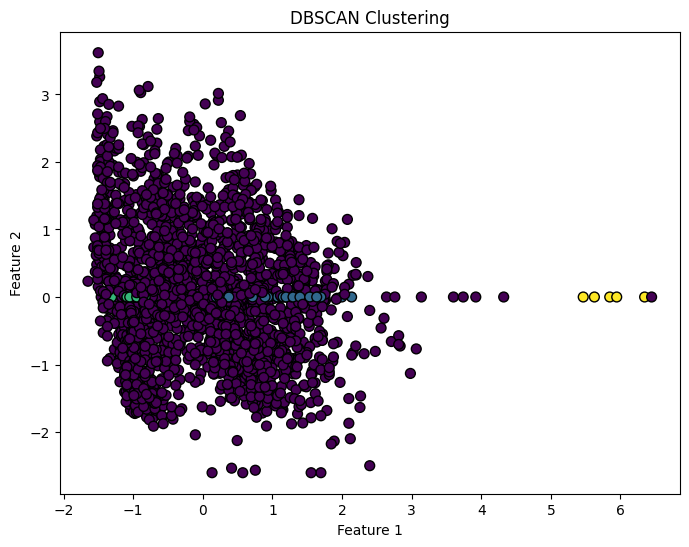

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic data
# X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.6, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(combined_data.to_numpy())

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points colored by cluster
plt.scatter(combined_data.to_numpy()[:, 0], combined_data.to_numpy()[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")

plt.show()


In [ ]:
k = 2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans on the standardized data
kmeans.fit(combined_data)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# Calculate silhouette score to evaluate the cluster quality
silhouette_avg = silhouette_score(combined_data, clusters)

print(f"Silhouette Score: {silhouette_avg}")

# Compare the cluster assignments to the original labels
# To do this, we create a contingency table (also known as a cross-tabulation)
contingency_table = pd.crosstab(combined_y, clusters, rownames=['Actual'], colnames=['Clustered'])

print(contingency_table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.44917303431635236
Clustered     0   1
Actual             
0           982  74
1          1194  93


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


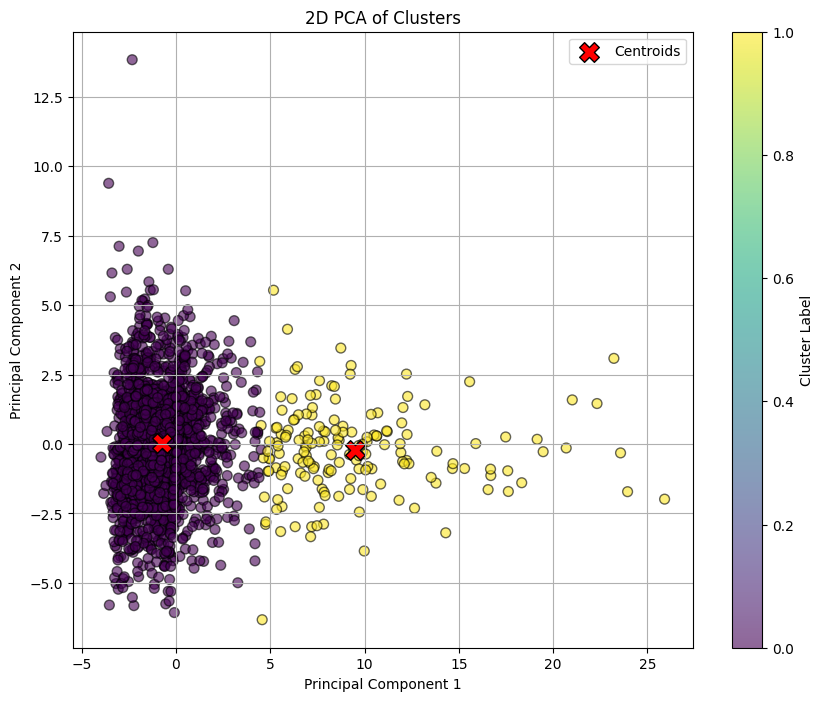

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction to 2 dimensions for visualization
pca = PCA(n_components=2)  # reduce to two components
X_pca = pca.fit_transform(combined_data)

# Plotting the first two PCA dimensions
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.title('2D PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

# Annotate the centroid if possible
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', edgecolor='k', label='Centroids')
plt.legend()

plt.grid(True)
plt.show()
